#Fundamentals of Linear Regression 

##Shantanu Yadav

Importing Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv,norm,det,eigvals,pinv
from mpl_toolkits.mplot3d import Axes3D

1. Understanding Error Surface:

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by
t = 3.86x − 110.42

In [3]:
def gaussian_noise(mean,variance,size=1):
    return np.random.normal(mean,variance,size)

In [4]:
def load_geogebra_data(N,D=1):
    #This function generates data_set of weight and height vectors
    #weight vector (x) is of size DxN
    #Height vector (t) is of size DxN and is given by 3.86x-110.42
    data_set={}
    x=np.random.uniform(30,120,(D,N))
    t=3.86*x-110.42*np.ones((D,N))
    data_set['weight']=x
    data_set['height']=t
    return data_set

(a) Generate 25 meaningful data points from this relationship, mimicking a noisy sensor, where the noise follows a zero mean Gaussian with a variance of 20. Plot the scatter plot of the data.

Text(0, 0.5, 'heights (train data)')

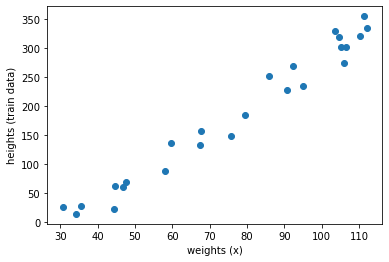

In [5]:
N=25
mean=0
variance=20
data_set=load_geogebra_data(N)
#Input vector (x) is of size DxN (In our case D=1,N=25)
x=data_set['weight']
t=data_set['height']
train_data=t+gaussian_noise(mean,variance,N)#np.reshape(gaussian_noise(0,20,N),(N,1))
plt.scatter(x,train_data)
plt.xlabel("weights (x)")
plt.ylabel("heights (train data)")

b) Now, we need to estimate the above relationship from the noisy data generated in (a) by fitting a line, i.e., ˆt = y(x, w) = w0 + w1x. Let us use least squares criterion discussed in the class to estimate the parameters w0 and w1. Generate and plot the error surface J(w0, w1) associated with this approach. Locate the minimum on this error surface.

In [6]:
def least_squares(X,y,regularized=False,lamda=0.01):
    #this code given solution of the least square problem 
    #Relation between inputs and least square solution is y=W.T@X where
    #X=[ones(N);x] and size(X) is (D+1)xN
    #Inputs:
    #y of size DxN
    #so W=pinv(X).T@y.T to give size of (D+1)X D
    if regularized:
        m,n=(X.T@X).shape
        W=(np.linalg.inv(X.T@X + lamda*np.eye(m,n))@X.T).T@y.T    
    else:     W=np.linalg.pinv(X).T@y.T
    return W

def stack_onearray(x,N):
    one_array=np.ones((1,N))
    return np.vstack((one_array,x))

def costfunction(x,y,weight_vector):
    h = x @ weight_vector
    return float((1./(2*np.size(y))) * (h - y).T @ (h - y));    
    

Estimated parameter vector :  [[-128.11679214    4.09881631]]


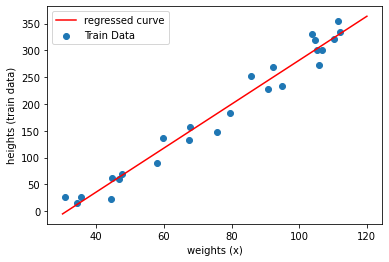

<Figure size 432x288 with 0 Axes>

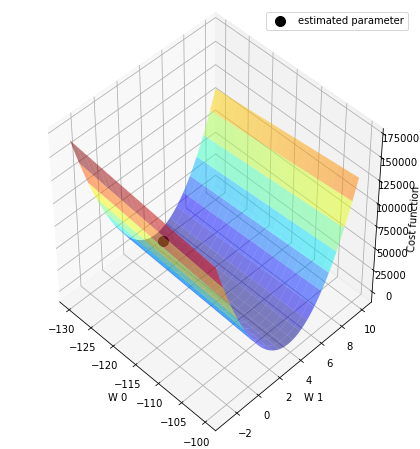

In [23]:
N=x.shape[1]
X=stack_onearray(x,N)
weight_vector=least_squares(X,train_data)

w=weight_vector
y=weight_vector.T@X
print('Estimated parameter vector : ',weight_vector.T)

xpoints=np.linspace(30,120)
Xpoints=stack_onearray(xpoints,len(xpoints))
plt.scatter(x,train_data,label='Train Data')
plt.plot(xpoints,(weight_vector.T@Xpoints).T,c='r',label='regressed curve')
plt.xlabel("weights (x)")
plt.ylabel("heights (train data)")
plt.legend()


#Plotting Cost Function and the minimum point
plt.figure()
T0, T1 = np.meshgrid(np.linspace(-130,-100,100),np.linspace(-3,10,100))
zs = np.array(  [costfunction(X.T, y.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )

Z = zs.reshape(T0.shape)
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.scatter(weight_vector[0],weight_vector[1],label="estimated parameter",color="black",marker="o",s=100)

ax.set_xlabel('W 0')
ax.set_ylabel('W 1')
ax.set_zlabel('Cost function')
ax.view_init(45, -45)
plt.legend()
plt.show()


In [25]:
print('Estimated Parameters are ',w.T)

Estimated Parameters are  [[-128.11679214    4.09881631]]


Observation: From the 3D surface plot it is clear that weight vector obtained from linear regression gives the minimum value of cost function.

2. Understanding Model Order and Over-fitting:

(a) Generate 20 data points from tn = sin(2πxn) + en, where xn ∈ [01] and
en/ N(0, 0.1), and divide them into two sets, a training set and a testing test
each containing 10 points.

In [9]:
def load_Q2data(N,D=1,e_part=False):
    data_set={}
    x=np.random.uniform(0,1,(D,N))
    if e_part:
            t=5+np.sin(2*np.pi*x)+np.reshape(gaussian_noise(0,0.1,N),(x.shape))
    else:
        t=np.sin(2*np.pi*x)+np.reshape(gaussian_noise(0,0.1,N),(x.shape))
    data_set['input']=x
    data_set['target']=t
    return data_set

def poly_kernel(x,M):
    #This function takes two inputs : x vector and size of kernel (M).
    #The polynomial kernel is [1;x;x^2;x^3;....;x^M] of size M+1xN
    if(m==0):
        poly_kernel=np.ones((1,x.shape[1]))
    else:
        poly_kernel=stack_onearray(x,x.shape[1])
        for i in range(2,M+1):
            poly_kernel=np.vstack((poly_kernel,x**i))
    return poly_kernel

In [10]:
N=20
p=0.5
q2_dataset=load_Q2data(N)
Xtr=q2_dataset['input'][:,0:int(p*N)]
Ytr=q2_dataset['target'][:,0:int(p*N)]
Xte=q2_dataset['input'][:,int(p*N):]
Yte=q2_dataset['target'][:,int(p*N):]

print("Size of Training Inputs :",Xtr.shape)
print("Size of Training Outputs :",Ytr.shape)
print("Size of Test Inputs :",Xte.shape)
print("Size of Test Outputs :",Yte.shape)

Size of Training Inputs : (1, 10)
Size of Training Outputs : (1, 10)
Size of Test Inputs : (1, 10)
Size of Test Outputs : (1, 10)


(b) Fit an Mth degree polynomial to the training data using least squares
approach, i.e.,

ˆtn = w0 + w1x + · · · + w_m*x^m + · · · + w_M*x^M

Use the estimated parameter vector w, to predict the target values in training
and testing datasets. Plot the root mean squared error associated with each
dataset, for M = 0, 1, . . . , 9. Explain your results.

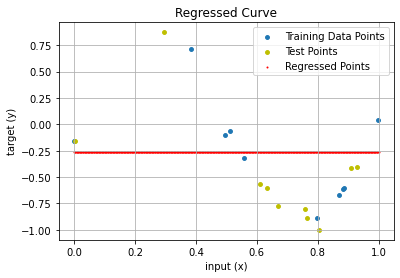

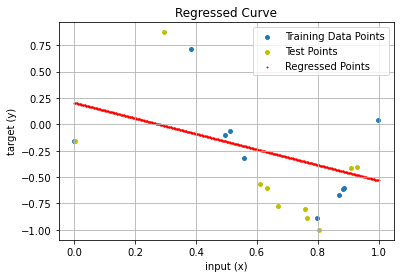

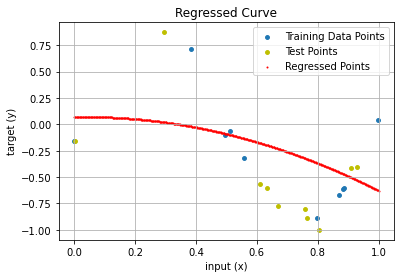

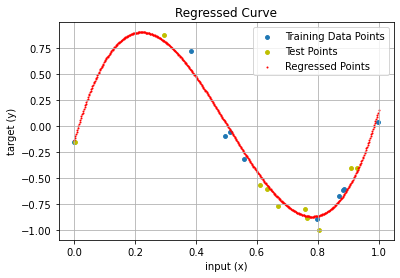

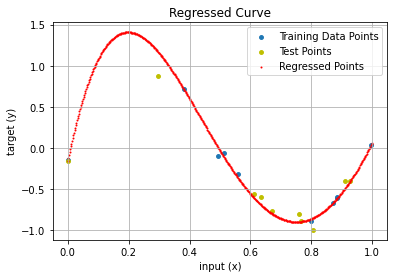

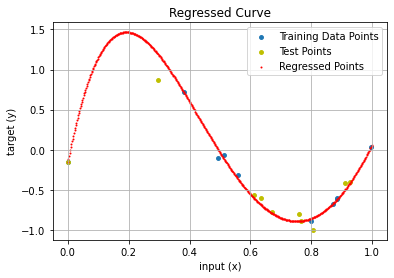

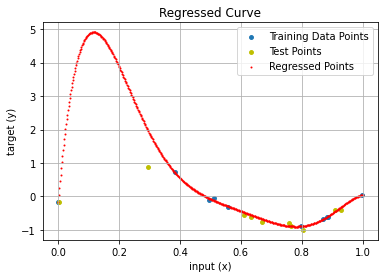

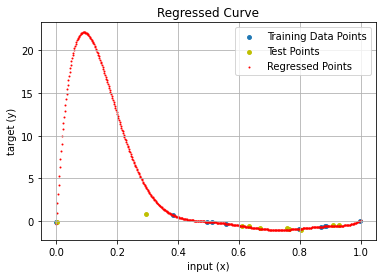

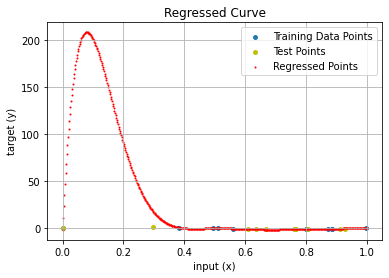

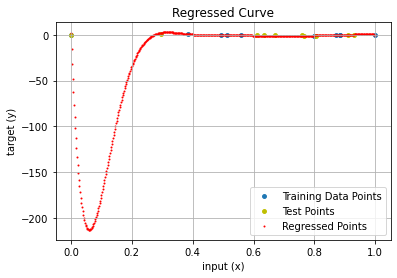

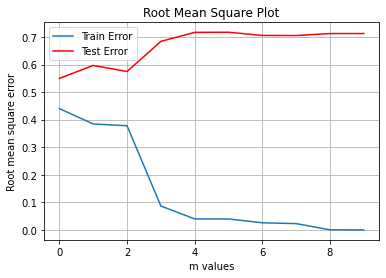

In [11]:
M=9
err_train=np.array([])
err_test=np.array([])
for m in range(M+1):
    phi=poly_kernel(Xtr,m)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    
    err_train=np.append(err_train,np.sqrt(sum(((y-Ytr)**2).flatten())/(p*N)))
    err_test=np.append(err_test,np.sqrt(sum(((y-Yte)**2).flatten())/(p*N)))
    
    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=poly_kernel(xpoints,m)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    #plt.plot(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)
    
#Plotting Root mean square error between predicted target values and test dataset
plt.figure()            
plt.plot(err_train,label='Train Error')
plt.plot(err_test,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.legend()
plt.grid(True)

(c) Increase the size of the training dataset o 100 points, and repeat (b).

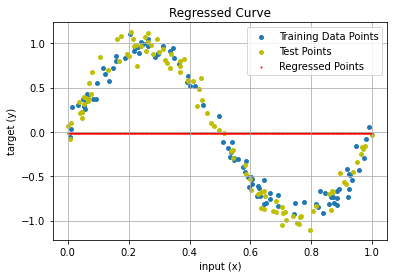

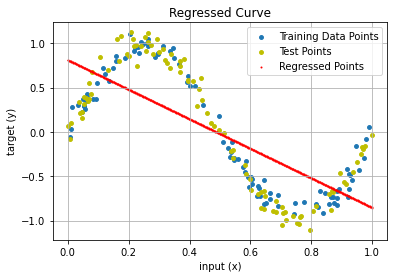

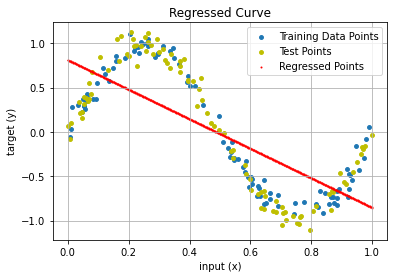

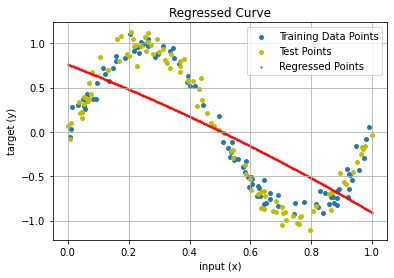

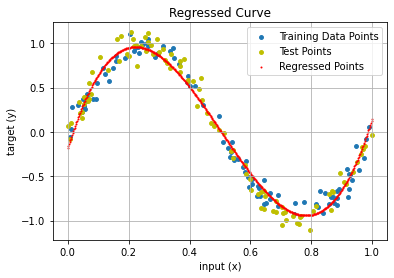

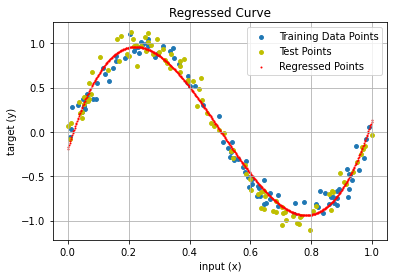

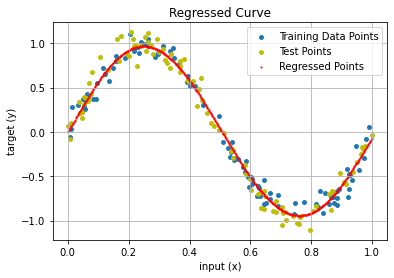

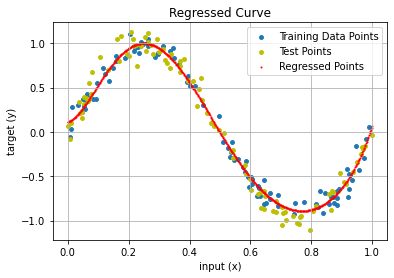

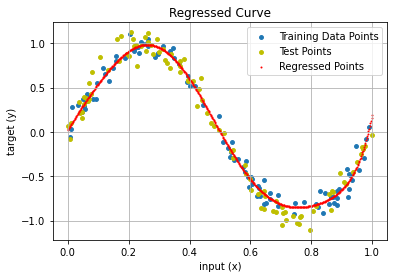

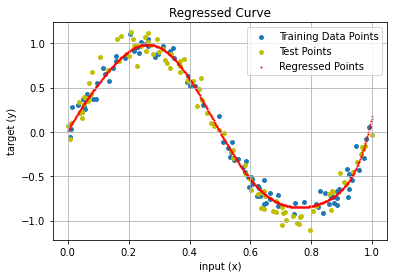

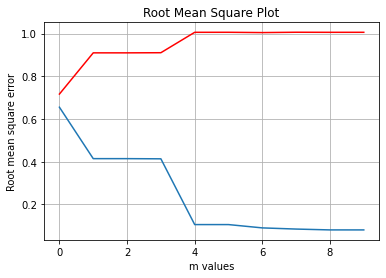

In [190]:
N=200
p=0.5
q2_dataset=load_Q2data(N)
Xtr=q2_dataset['input'][:,0:int(p*N)]
Ytr=q2_dataset['target'][:,0:int(p*N)]
Xte=q2_dataset['input'][:,int(p*N):]
Yte=q2_dataset['target'][:,int(p*N):]

M=9
err_train=np.array([])
err_test=np.array([])
for m in range(M+1):
    phi=poly_kernel(Xtr,m)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    
    err_train=np.append(err_train,np.sqrt(sum(((y-Ytr)**2).flatten())/(p*N)))
    err_test=np.append(err_test,np.sqrt(sum(((y-Yte)**2).flatten())/(p*N)))

    
    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=poly_kernel(xpoints,m)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    #plt.plot(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)
    
#Plotting Root mean square error between predicted target values and test dataset
plt.figure()            
plt.plot(err_train)
plt.plot(err_test,c='r')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.grid(True)


(d) Add a l2 regularization term to the objective function in (b) and repeat (b)
and (c). Study the affect of Lagrange multiplier λ on the root mean squared
error of the training and testing datasets.

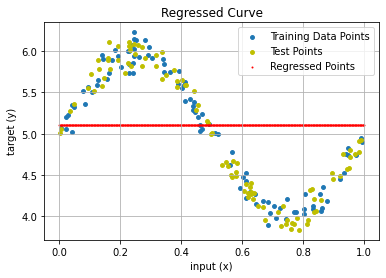

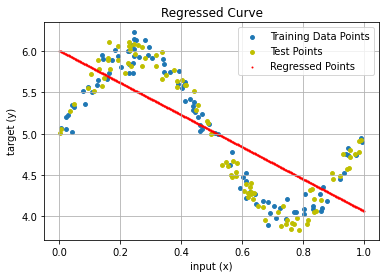

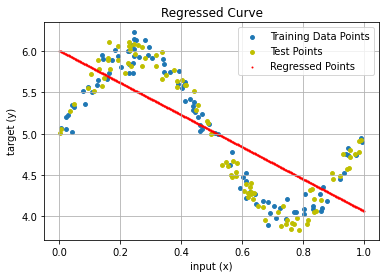

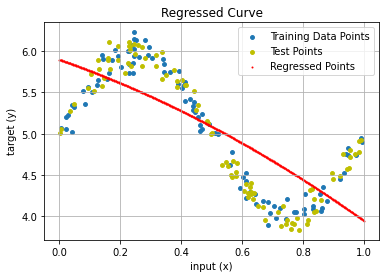

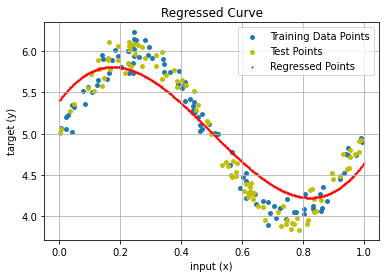

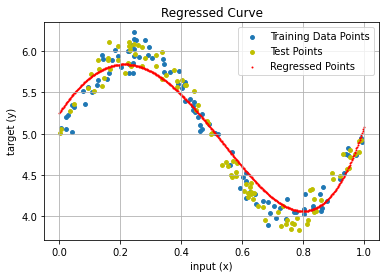

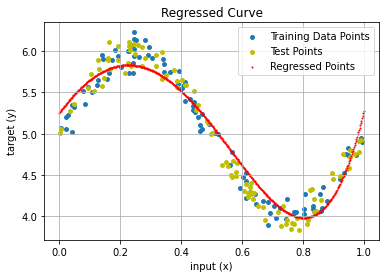

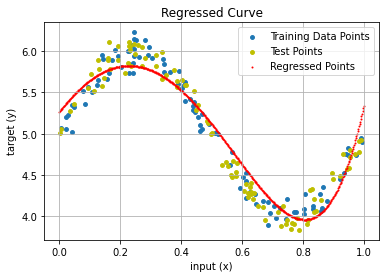

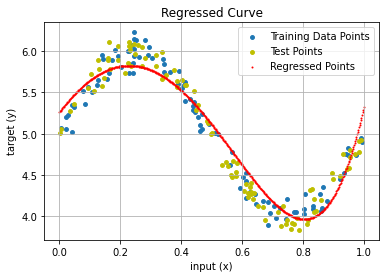

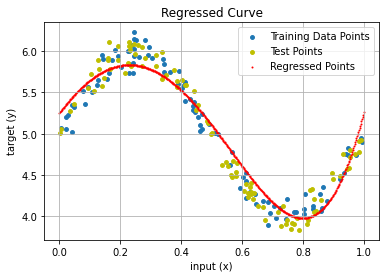

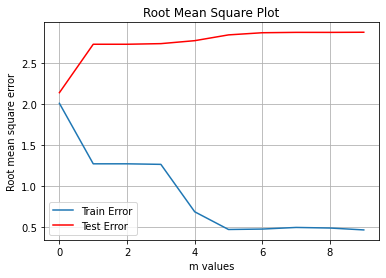

In [27]:
#Regularized
M=9
err_train=np.array([])
err_test=np.array([])
for m in range(M+1):
    phi=poly_kernel(Xtr,m)
    weight_vector=least_squares(phi,Ytr,regularized=True)
    y=weight_vector.T@phi
    
    err_train=np.append(err_train,np.sqrt(sum(((y-Ytr)**2).flatten())/(p*N)))
    err_test=np.append(err_test,np.sqrt(sum(((y-Yte)**2).flatten())/(p*N)))

    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=poly_kernel(xpoints,m)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    #plt.scatter(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)
    
#Plotting Root mean square error between predicted target values and test dataset
plt.figure()            
plt.plot(err_train,label='Train Error')
plt.plot(err_test,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.legend()
plt.grid(True)

Regularization is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

We see from the two plots that the curve smoothens for regularized case, even the error curve.

(e) Modify the function in (a) to tn = 5 + sin(2πxn) + en to study the effect of
regularizing the bias coefficient w0.

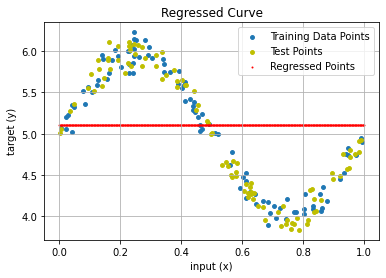

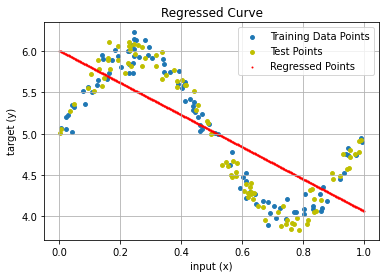

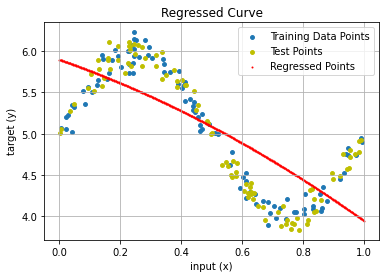

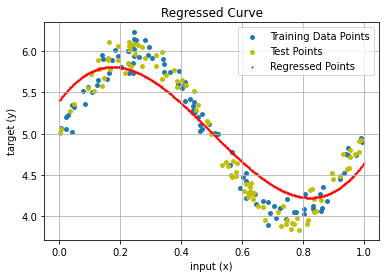

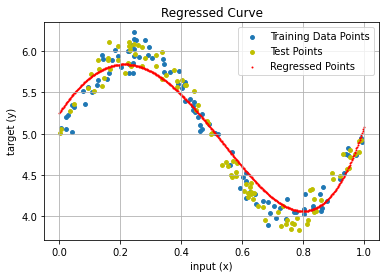

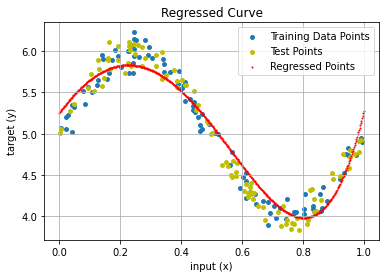

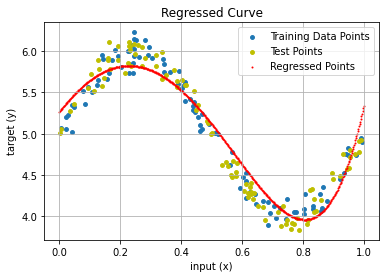

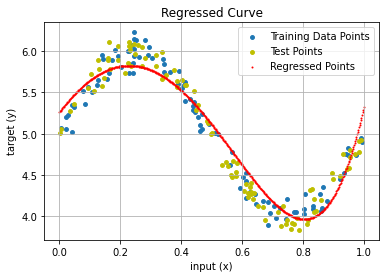

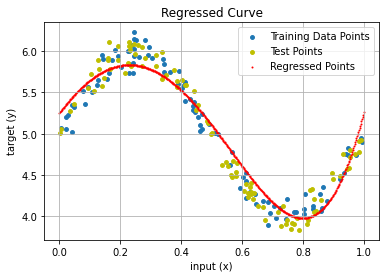

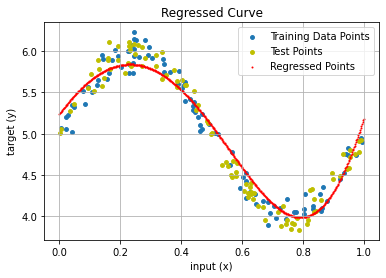

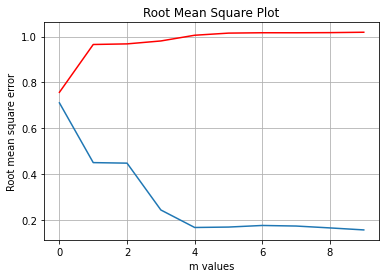

In [15]:
N=200
p=0.5
q2_dataset=load_Q2data(N,e_part=True)
Xtr=q2_dataset['input'][:,0:int(p*N)]
Ytr=q2_dataset['target'][:,0:int(p*N)]
Xte=q2_dataset['input'][:,int(p*N):]
Yte=q2_dataset['target'][:,int(p*N):]

#Regularized
M=9
err_train=np.array([])
err_test=np.array([])
for m in range(M+1):
    phi=poly_kernel(Xtr,m)
    weight_vector=least_squares(phi,Ytr,regularized=True)
    y=weight_vector.T@phi
    
    err_train=np.append(err_train,np.sqrt(sum(((y-Ytr)**2).flatten())/(p*N)))
    err_test=np.append(err_test,np.sqrt(sum(((y-Yte)**2).flatten())/(p*N)))

    
    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=poly_kernel(xpoints,m)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    #plt.scatter(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)
    
#Plotting Root mean square error between predicted target values and test dataset
plt.figure()            
plt.plot(err_train,label='Train Error')
plt.plot(err_test,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.grid(True)

3. Understanding Choice of Kernel:

(a) Generate 100 data points from tn = sin(2πxn) + en, where xn ∈ [0 1] and
en/ N(0, 0.1), and divide them into two sets, a training set and a testing test
each containing 10 points. Fit an Mth degree polynomial using polynomial,
Gaussian and sigmoidal kernels, and study the goodness of fit in each case,
for different model orders M.

In [19]:
def poly_kernel(x,M):
    #This function takes two inputs : x vector and size of kernel (M).
    #The polynomial kernel is [1;x;x^2;x^3;....;x^M] of size M+1xN
    if(m==0):
        poly_kernel=np.ones((1,x.shape[1]))
    else:
        poly_kernel=stack_onearray(x,x.shape[1])
        for i in range(2,M):
            poly_kernel=np.vstack((poly_kernel,x**i))
    return poly_kernel

def gaussian_kernel(x,mean,sigma):
    #This function takes three inputs : 
    #x vector, mean vector and scalar variance
    #Eg gaussian_kernel(x,[1,2,3,4,5,6,7,8,9],0.3)
    if (len(mean)==1):
        gauss_kernel=np.reshape(np.array([np.exp(-(x-mean[i]*np.ones(x.shape))/(2*variance)) for i in range(len(mean))]).squeeze(),(1,x.shape[1]))
    else:
        gauss_kernel=np.array([np.exp(-(x-mean[i]*np.ones(x.shape))**2/(2*sigma**2)) for i in range(len(mean))]).squeeze()
    return gauss_kernel                    

def sigmoid(a):
    return 1/(1+np.exp(a))

def sigmoid_kernel(x,mean,sigma):
    if (len(mean)==1):
        sig_kernel=np.reshape(np.array([sigmoid((x-mean[i]*np.ones(x.shape))/sigma) for i in range(len(mean))]).squeeze(),(1,x.shape[1]))
    else:
        sig_kernel=np.array([sigmoid((x-mean[i]*np.ones(x.shape))/sigma) for i in range(len(mean))]).squeeze()
    return sig_kernel

def load_Q3data(N,mean=0,sigma=1):
    data_set={}
    t=np.array([])
    x=np.random.uniform(0,3,(1,N))
    if x.any()<0 or x.any()>3:
        print("input not in range between 0 and 3")
        exit()
    for i in x[0,:]:
        #sinusoid
        if 0<=i and i<1:
            t=np.append(t,np.sin(2*np.pi*i)+gaussian_noise(0,0.1))
        #triangle
        if 1<=i and i<2:
            if 1<=i and i<1.5:
                t=np.append(t,2*i-2+gaussian_noise(0,0.1))
            else:
                t=np.append(t,-2*i+4+gaussian_noise(0,0.1))
        #gaussian
        if 2<=i and i<=3:
            t=np.append(t,np.exp(-(i-mean)**2/2*sigma**2)+gaussian_noise(0,0.1))
    t=np.reshape(t,x.shape)
    data_set['input']=x
    data_set['target']=t
        
    return data_set

In [ ]:
#Generating Data
N=200
p=0.5
q2_dataset=load_Q2data(N)
Xtr=q2_dataset['input'][:,0:int(p*N)]
Ytr=q2_dataset['target'][:,0:int(p*N)]
Xte=q2_dataset['input'][:,int(p*N):]
Yte=q2_dataset['target'][:,int(p*N):]


Minimum error occurs for M = 9 and its values is  0.298883099738174


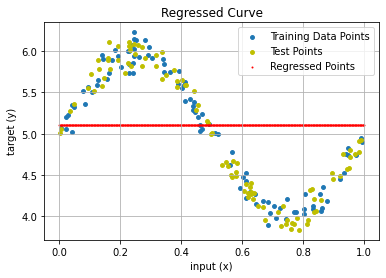

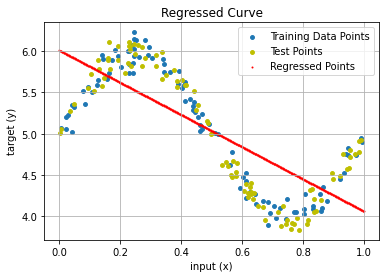

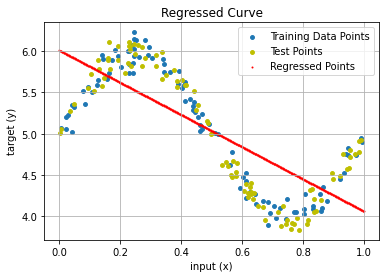

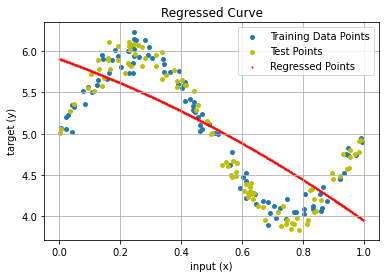

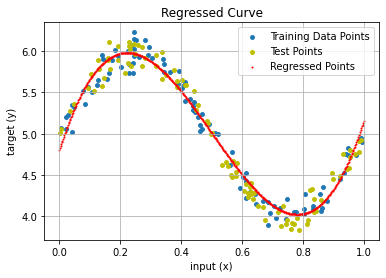

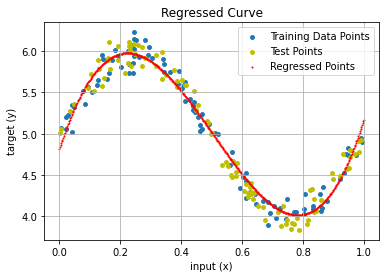

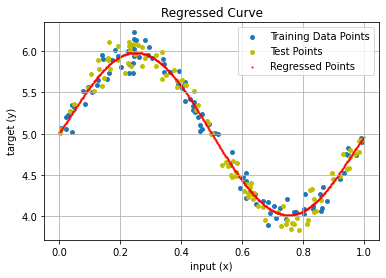

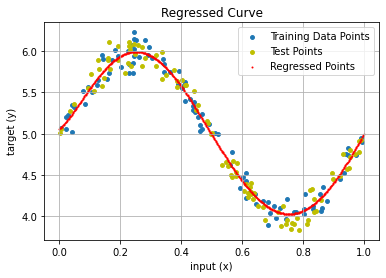

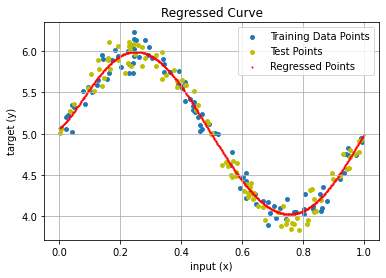

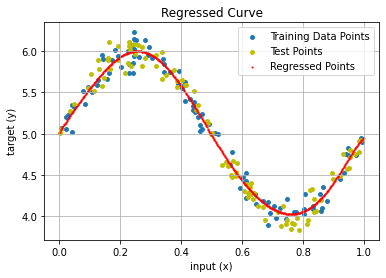

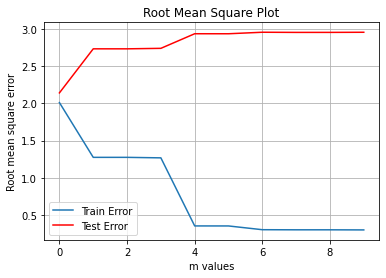

In [30]:
#Polynomial Kernel

err_train=np.array([])
err_test=np.array([])
for m in range(M+1):
    phi=poly_kernel(Xtr,m)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    
    err_train=np.append(err_train,np.sqrt(sum(((y-Ytr)**2).flatten())/(p*N)))
    err_test=np.append(err_test,np.sqrt(sum(((y-Yte)**2).flatten())/(p*N)))

    
    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=poly_kernel(xpoints,m)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    #plt.plot(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)

m_value=np.argmin(err_train)
min_err=err_train[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)

#Plotting Root mean square error between predicted target values and test dataset

plt.figure()            
plt.plot(err_train,label='Train Error')
plt.plot(err_test,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.legend()
plt.grid(True)

Minimum error occurs for M = 5 and its values is  0.33269975582486677


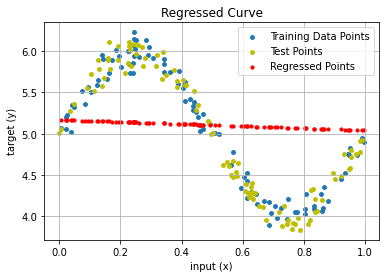

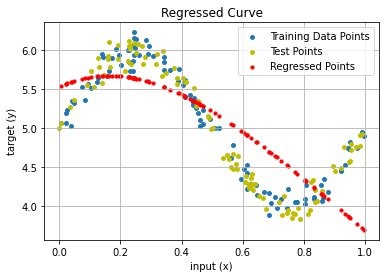

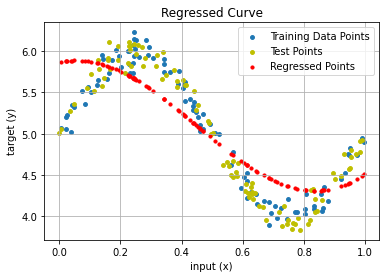

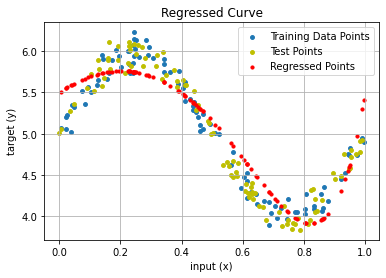

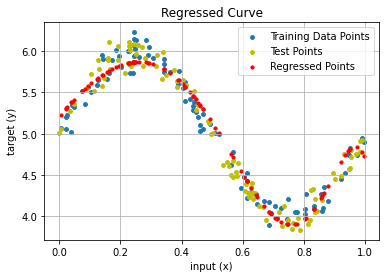

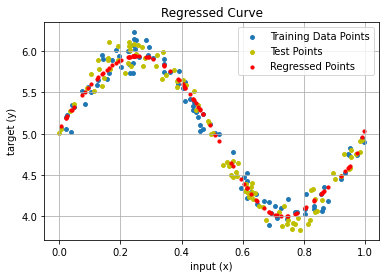

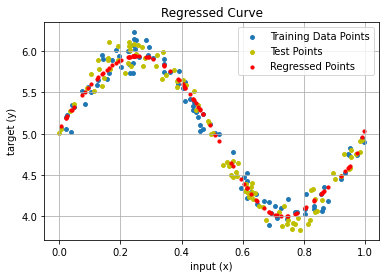

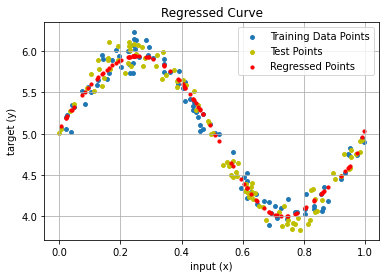

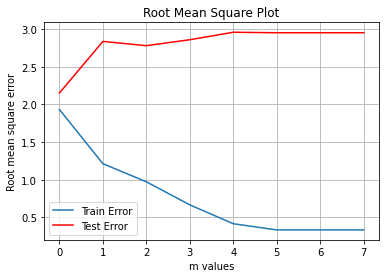

In [31]:
#Using gaussian kernel
err_train=np.array([])
err_test=np.array([])
for m in range(1,M):
    phi=gaussian_kernel(Xtr,np.arange(m),0.6)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    
    err_train=np.append(err_train,np.sqrt(sum(((y-Ytr)**2).flatten())/(p*N)))
    err_test=np.append(err_test,np.sqrt(sum(((y-Yte)**2).flatten())/(p*N)))

    
    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=gaussian_kernel(xpoints,np.arange(m),10)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    #plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    plt.scatter(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)
    
m_value=np.argmin(err_train)
min_err=err_train[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)    

#Plotting Root mean square error between predicted target values and test dataset
plt.figure()            
plt.plot(err_train,label='Train Error')
plt.plot(err_test,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.legend()
plt.grid(True)

Minimum error occurs for M = 6 and its values is  0.3073998481744122


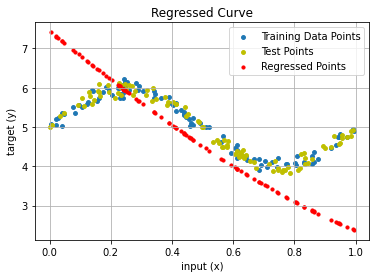

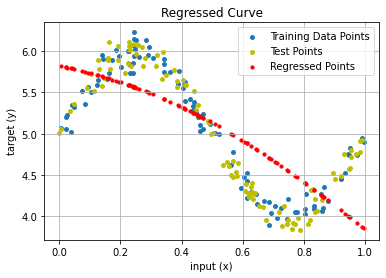

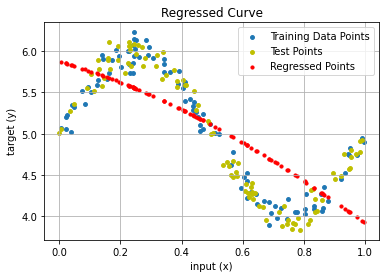

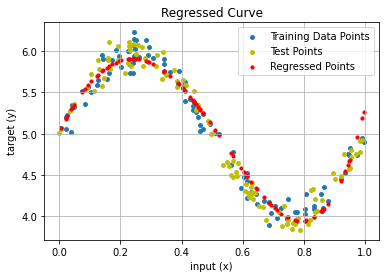

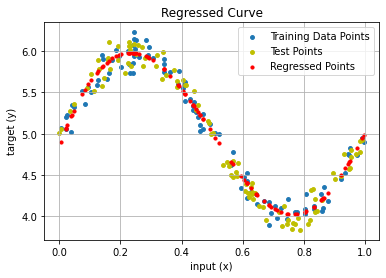

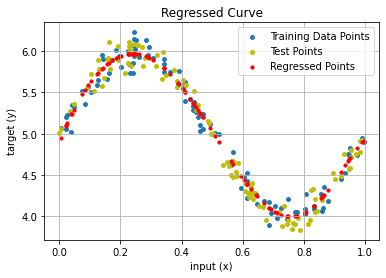

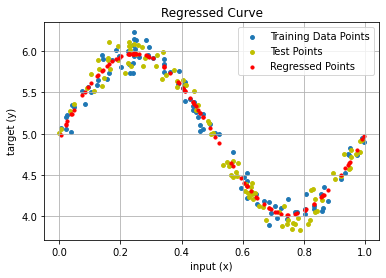

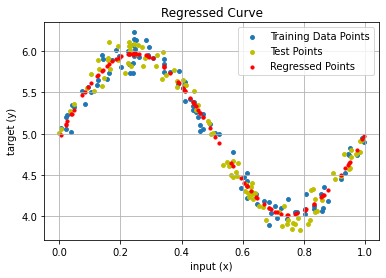

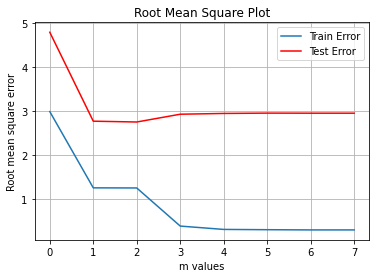

In [32]:
#Using sigmoid kernel
err_train=np.array([])
err_test=np.array([])
for m in range(1,M):
    phi=sigmoid_kernel(Xtr,np.arange(m),0.6)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    
    err_train=np.append(err_train,np.sqrt(sum(((y-Ytr)**2).flatten())/(p*N)))
    err_test=np.append(err_test,np.sqrt(sum(((y-Yte)**2).flatten())/(p*N)))
    
    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=sigmoid_kernel(xpoints,np.arange(m),10)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    #plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    plt.scatter(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)

m_value=np.argmin(err_train)
min_err=err_train[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)

#Plotting Root mean square error between predicted target values and test dataset
plt.figure()            
plt.plot(err_train,label='Train Error')
plt.plot(err_test,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.legend()
plt.grid(True)

(b) Repeat (a) by modifying the target function to

tn =   sinusoid + en x ∈ [0, 1)

       triangle + en x ∈ [1, 2)
       
       Gaussian pulse + en ∈ [2, 3]

Clearly discuss your observations/results for each of the three kernels.

Size of Training Inputs : (1, 100)
Size of Training Outputs : (1, 100)
Size of Test Inputs : (1, 100)
Size of Test Outputs : (1, 100)


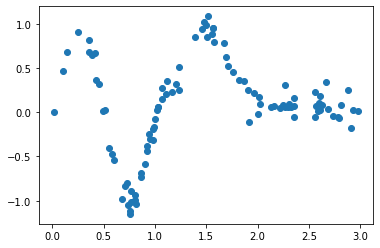

In [40]:
N=200
p=0.5
q3_dataset=load_Q3data(N)
Xtr=q3_dataset['input'][:,0:int(p*N)]
Ytr=q3_dataset['target'][:,0:int(p*N)]
Xte=q3_dataset['input'][:,int(p*N):]
Yte=q3_dataset['target'][:,int(p*N):]

print("Size of Training Inputs :",Xtr.shape)
print("Size of Training Outputs :",Ytr.shape)
print("Size of Test Inputs :",Xte.shape)
print("Size of Test Outputs :",Yte.shape)

plt.scatter(Xtr,Ytr)

Minimum error occurs for M = 9 and its values is  0.16692153703982177


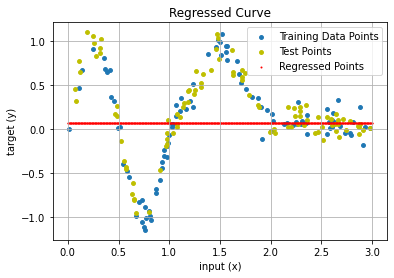

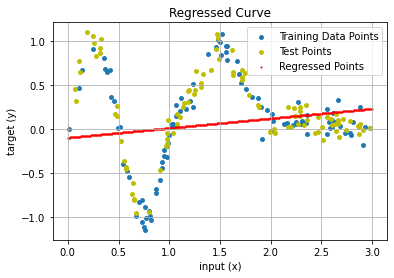

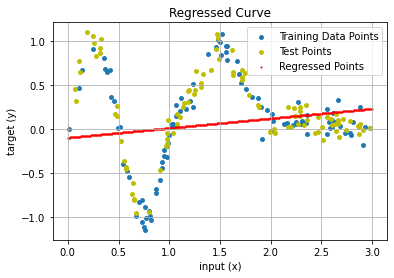

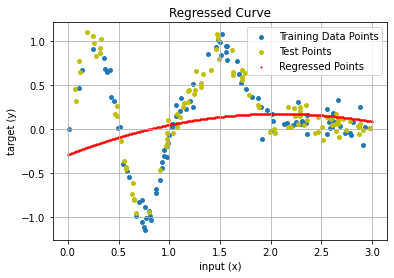

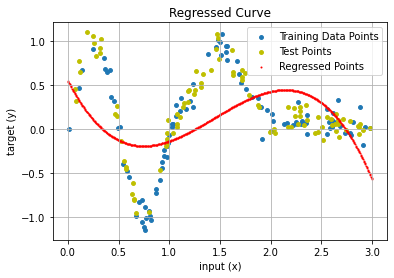

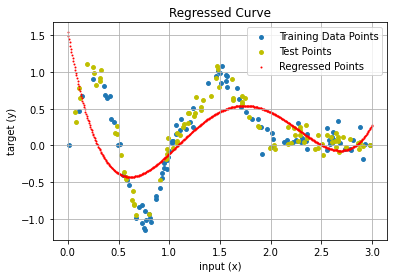

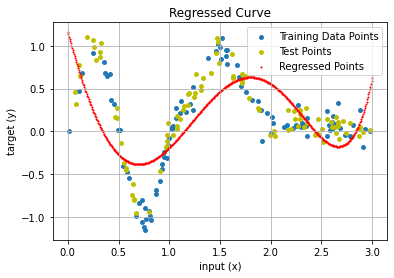

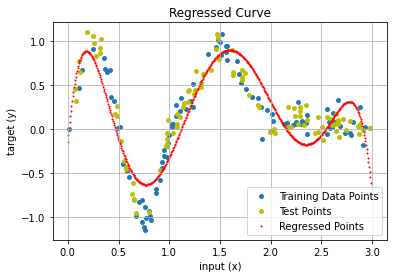

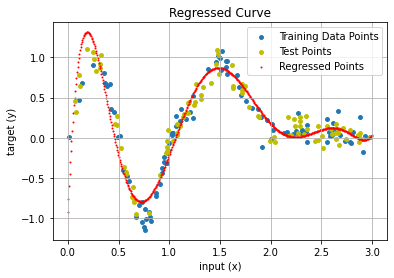

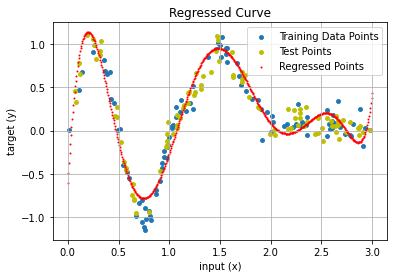

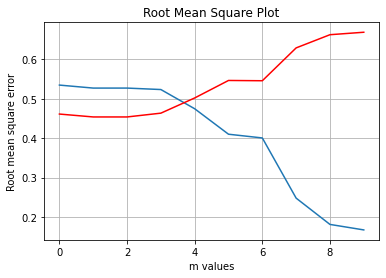

In [41]:
#Polynomial Kernel
M=9
err_train=np.array([])
err_test=np.array([])
for m in range(M+1):
    phi=poly_kernel(Xtr,m)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    
    err_train=np.append(err_train,np.sqrt(sum(((y-Ytr)**2).flatten())/(p*N)))
    err_test=np.append(err_test,np.sqrt(sum(((y-Yte)**2).flatten())/(p*N)))

    
    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,3,500),(1,500))
    phi_points=poly_kernel(xpoints,m)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    #plt.plot(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)

m_value=np.argmin(err_train)
min_err=err_train[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)

#Plotting Root mean square error between predicted target values and test dataset
plt.figure()            
plt.plot(err_train,label='Train Error')
plt.plot(err_test,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.grid(True)

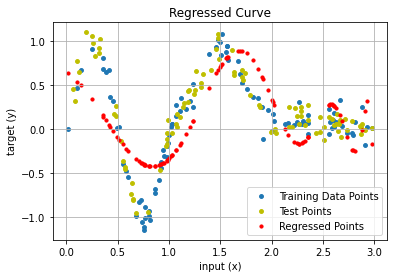

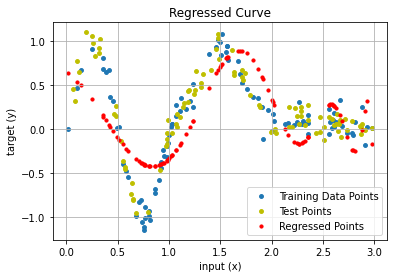

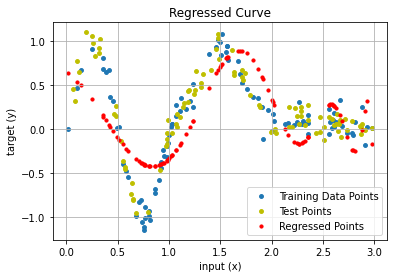

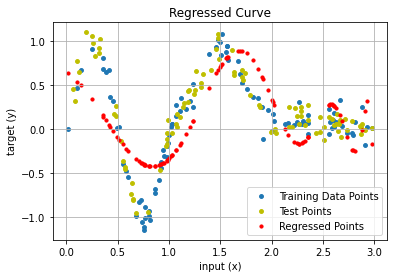

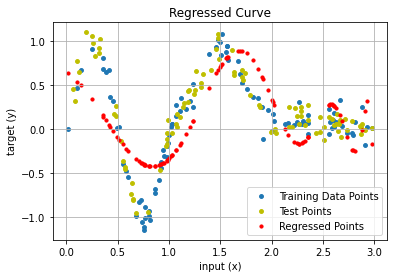

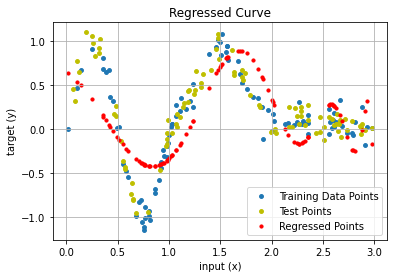

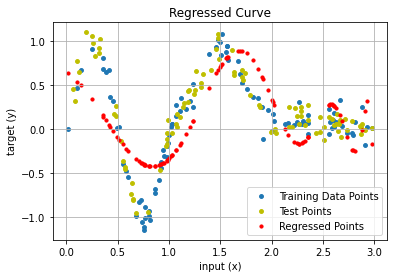

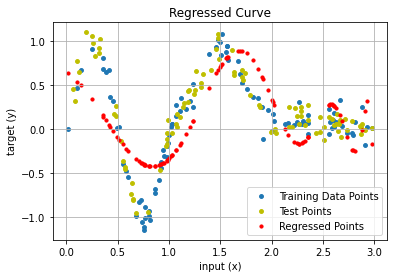

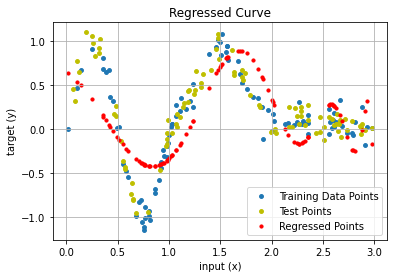

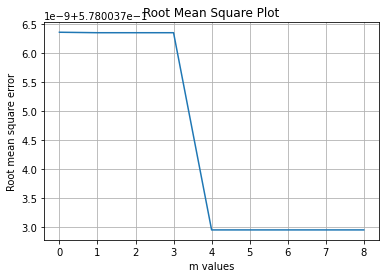

In [43]:
#Using gaussian kernel
err=np.array([])
for m in range(1,M+1):
    phi=gaussian_kernel(Xtr,np.arange(20*m),0.6)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt((np.linalg.norm(y-Yte)**2).flatten()/(p*N)))

    
    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,3,500),(1,500))
    phi_points=gaussian_kernel(xpoints,np.arange(m),10)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    #plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    plt.scatter(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)
    
#Plotting Root mean square error between predicted target values and test dataset
plt.figure()            
plt.plot(err)
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.grid(True)

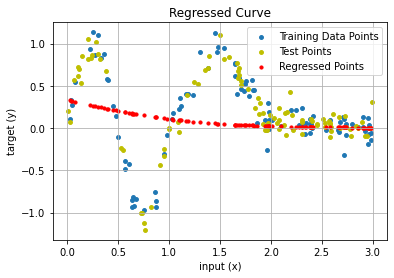

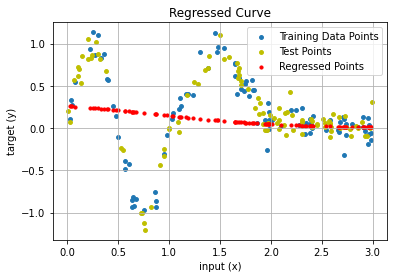

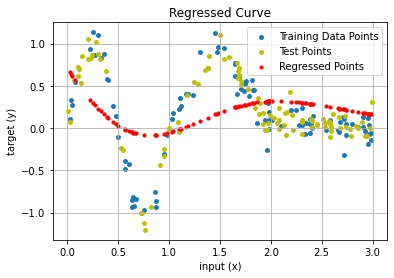

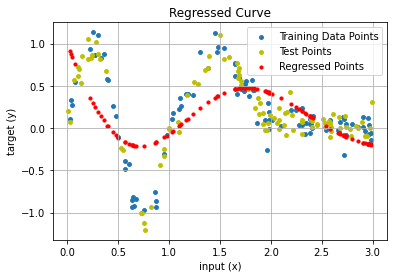

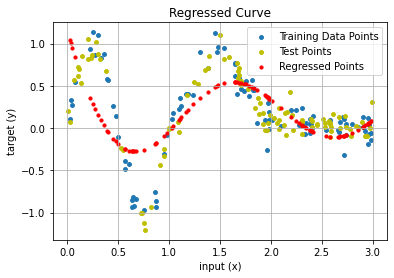

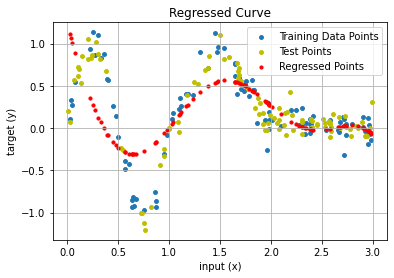

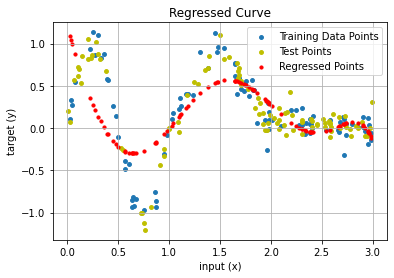

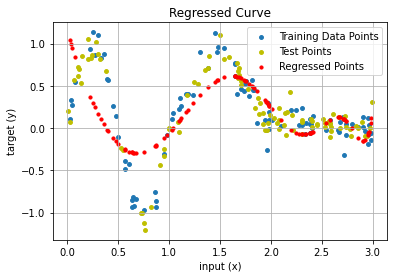

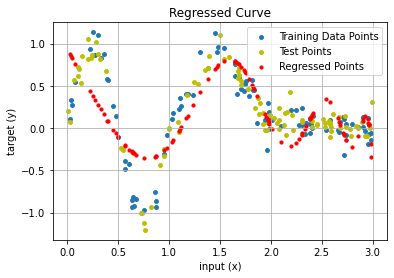

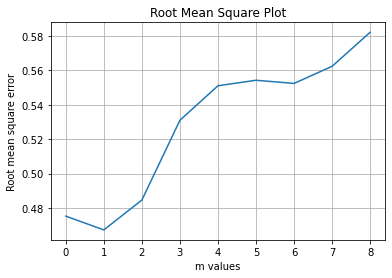

In [171]:
#Using sigmoid kernel
err=np.array([])
for m in range(1,M+1):
    phi=sigmoid_kernel(Xtr,np.arange(m),0.6)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-Yte)**2).flatten())/(p*N)))

    
    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,3,500),(1,500))
    phi_points=sigmoid_kernel(xpoints,np.arange(m),10)
    
    plt.figure()
    plt.scatter(Xtr,Ytr,15,label='Training Data Points')
    plt.scatter(Xte,Yte,15,label='Test Points',c='y')
    #plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    plt.scatter(Xtr,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve")
    plt.grid(True)
    
#Plotting Root mean square error between predicted target values and test dataset
plt.figure()            
plt.plot(err)
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot")
plt.grid(True)

Observation: The least training error occurs in case for Gaussian Kernel. This is because polynomial kernel is a global kernel whereas Gaussian and Sigmoid are local kernel.

4. Understanding Online Training:

(a) Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.
Study the effect of step size η on convergence of the weights, and compare
them to those obtained using closed form expressions in 3. Plot the mse as
a function of iterations.

In [44]:
def load_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    #np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t
def function(x):
    func=3.68*x-110.42 #height and weight relationship
    return func
def sinusoidal(x):
    return np.sin(2 * np.pi * x)
def sigmoid(z): 
  return 1 / (1 + np.exp(-z))

def gaussian_kernel(x, mu, s):
  return np.exp(-(x - mu)**2 / (2*s**2))
  
def gaussian_standard(x):
  return np.exp(-(x)**2 / (2 *1**2))
def sigmoid_kernel(x, mu, s): 
  return sigmoid((x - mu) / s)
def sigmoid_standard(x): 
  return sigmoid(x)
def gaussian_design_matrix(x, mus, s, bias=True):
    Phi = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi


def sigmoid_design_matrix(x, mus, s, bias=True):
    Phi = sigmoid_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def polynomial_design_matrix(x, powers, bias=True):
    Phi = np.column_stack((x ** p for p in powers))
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi

# linear regression using "stochastic" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing various-batches 
def create_diff_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform batch gradient descent #By default,batch size is 32
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 100
    for itr in range(max_iters): 
        mini_batches = create_diff_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
    return theta, error_list

Bias without any kernel =  [0.62304242]
Coefficients without any kernel =  []
Mean absolute error  =  1.322210060787171


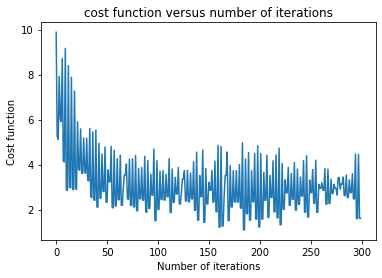

Bias with polynomial kernel of order 8 =  [0.06882492]
Coefficients with polynomial of oder 8 =  [[0.06882492]
 [0.06882492]
 [0.06882492]
 [0.06882492]
 [0.06882492]
 [0.06882492]
 [0.06882492]
 [0.06882492]]


<ipython-input-44-fea4f2c8e37c>:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Phi = np.column_stack((x ** p for p in powers))


Bias with sigmoid kernel of order 8 =  [0.27070282]
Coefficients with sigmoid of oder 8 =  [[2.70690533e-01]
 [1.35351411e-01]
 [1.22893312e-05]
 [5.57960101e-10]
 [2.53313494e-14]
 [1.15004149e-18]
 [5.22118026e-23]
 [2.37041217e-27]
 [1.07616546e-31]
 [4.88578364e-36]
 [2.21814234e-40]]
Bias with polynomial kernel of order 8 =  [0.0792939]
Coefficients with polynomial of oder 8 =  [[0.0792939]
 [0.0792939]
 [0.0792939]
 [0.0792939]
 [0.0792939]
 [0.0792939]
 [0.0792939]]
coefficients for polynomial kernel we get for model orders from 0 to 9 is [3.32417443e-001 1.28509929e-003 3.32417443e-001 1.28509929e-003
 7.42498050e-011 6.41150092e-023 8.27427321e-040 1.59590032e-061
 4.60031344e-088 1.98186853e-119 3.19594062e-001 1.23552512e-003
 3.19594062e-001 1.23552512e-003 7.13855343e-011 6.16416998e-023
 7.95508371e-040 1.53433665e-061 4.42285112e-088 1.90541570e-119
 3.25927362e-001 1.26000915e-003 3.25927362e-001 1.26000915e-003
 7.28001602e-011 6.28632350e-023 8.11272724e-040 1.5647421

Text(0.5, 1.0, 'Model order versus errors for gaussian kernel for modified target')

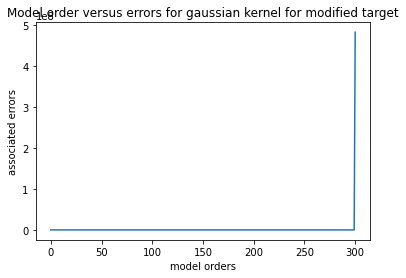

In [45]:
x,data = load_data(sinusoidal,100,np.sqrt(0.1)) #creating data set of 100 ,50 for training,50 for testing
y_true=sinusoidal(x)
data=np.reshape(data,(100,1))

# train-test-split i.e 50 for train and 50 for test
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
  
split_factor = 0.50
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))

#Performing gradient descent without any kernel 
theta, error_list = gradientDescent(X_train,y_train) 
print("Bias without any kernel = ", theta[0]) 
print("Coefficients without any kernel = ", theta[1:]) 
# predicting output for X_test 
y_pred = hypothesis(X_test,theta)
# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error  = ", error) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost function") 
plt.title("cost function versus number of iterations")
plt.show()

#Polynomial kernel
M=8 #let Model order is 8
powers=[i for i in range(M)]
P= polynomial_design_matrix(X_train, powers, bias=True)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with polynomial kernel of order 8 = ", theta[0]) 
print("Coefficients with polynomial of oder 8 = ", theta[1:]) 

#3(a) repeating 3 (a) using gradient descent
# WITH POLYNOMIAL KERNEL
xpoints1 = np.linspace(0, 1,50) #with poynomial kernel
powers=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(X_train, powers, bias=True)
  W,z = gradientDescent(X,y_train) # normal equation
  predicted=X.dot(W)
#With sigmoid kernel
#Sigmoid kernel
M=11 #let Model order is 11
X_train=X_train.ravel()
mus=np.arange(11)
P=sigmoid_design_matrix(X_train, mus, s=0.1, bias=True)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with sigmoid kernel of order 8 = ", theta[0]) 
print("Coefficients with sigmoid of oder 8 = ", theta[1:]) 

for i in range(10):
  mus=np.arange(i)
  X = sigmoid_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z = gradientDescent(X,y_train) 
  predicted=X.dot(W)

#WITH GAUSSIAN KERNEL
for i in range(10):  
  mus=np.arange(i)
  X = gaussian_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z= gradientDescent(X,y_train) 
  predicted=X.dot(W)


  #Repeting 3(b) using gradient descent for modified target
  
#Creating 100 data points ,50 for training and 50 for testing for modified target

x,data = load_data(sinusoidal,100,np.sqrt(0.1)) #creating data set of 100 ,50 for training,50 for testing
y_true=sinusoidal(x)
data=np.reshape(data,(100,1))

# train-test-split i.e 50 for train and 50 for test
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
  
split_factor = 0.50
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))
#Performing gradient descent without any kernel 

#Polynomial kernel
M=8 #let Model order is 8
powers=[i for i in range(M)]
P= polynomial_design_matrix(X_train, powers, bias=False)
#P=poly_kernel(X_train,powers,bias=False)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with polynomial kernel of order 8 = ", theta[0]) 
print("Coefficients with polynomial of oder 8 = ", theta[1:]) 

#3(a) repeating 3 (a) using gradient descent
# WITH POLYNOMIAL KERNEL
#with poynomial kernel
powers=[]
w=[]
for i in range(10):
  #powers=np.append(powers,i)
  #X = polynomial_design_matrix(X_train, powers, bias=True)
    
  W,z = gradientDescent(X,y_train) # normal equation
  w=np.append(w,W)
  
print("coefficients for polynomial kernel we get for model orders from 0 to 9 is",w)

#With sigmoid kernel
#Sigmoid kernel
M=11 #let Model order is 11
X_train=X_train.ravel()
mus=np.arange(11)
P=sigmoid_design_matrix(X_train, mus, s=0.1, bias=True)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with sigmoid kernel of order 8 = ", theta[0]) 
print("Coefficients with sigmoid of oder 8 = ", theta[1:]) 
w=[]
for i in range(10):
  mus=np.arange(i)
  X = sigmoid_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z = gradientDescent(X,y_train) 
  predicted=X.dot(W)
  w=np.append(w,W)
print("coefficients for sigmoid kernel we get for model orders from 0 to 9 is",w)

#WITH GAUSSIAN KERNEL
w=[]
z=[]
M=[i for i in range(10)]
for i in range(10):  
  mus=np.arange(i)
  X = gaussian_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z= gradientDescent(X,y_train) 
  predicted=X.dot(W)
  w=np.append(w,W)
  z=np.append(z,np.sum(Z))
print("coefficients for gaussian kernel we get for model orders from 0 to 9 is",w)
plt.figure()
plt.plot(z)
plt.xlabel("model orders")
plt.ylabel("associated errors")
plt.title("Model order versus errors for gaussian kernel for modified target")


Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties.
A compromise between computing the true gradient and the gradient at a single example is to compute the gradient against more than one training example (called a "mini-batch") at each step. 
This can perform significantly better than "true" stochastic gradient descent described, because the code can make use of vectorization libraries rather than computing each step separately.
It may also result in smoother convergence, as the gradient computed at each step is averaged over more training examples.

(b) Study the effect of batch size on the speed of
convergence.

<ipython-input-172-fea4f2c8e37c>:94: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradient(X_mini, y_mini, theta)


Text(0.5, 1.0, 'error versus batch size')

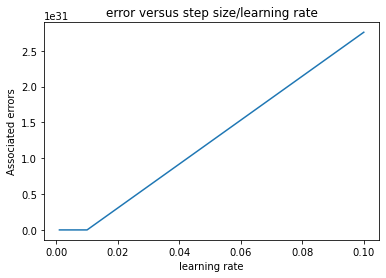

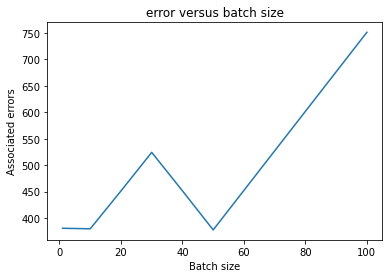

In [176]:
#Effect of step size on convergence of weight vectors
x,data = load_data(sinusoidal,100,np.sqrt(0.1)) #creating data set of 100 ,50 for training,50 for testing
y_true=sinusoidal(x)
data=np.reshape(data,(100,1))

# train-test-split i.e 50 for train and 50 for test
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
  
split_factor = 0.50
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))
learning_rate=[0.001,0.01,0.1,1,10,100,1000] #Different learning rates
weight_vectors=[]
error=[]
i=0
for i in range(len(learning_rate)):
  w,errorr=gradientDescent(X_train,y_train, learning_rate[i], batch_size = 32)
  error=np.append(error,np.sum(errorr))
  w=np.append(weight_vectors,w)
  i=i+1
plt.figure()
plt.plot(learning_rate,error)
plt.xlabel("learning rate")
plt.ylabel("Associated errors")
plt.title("error versus step size/learning rate")
#Effect of different batch sizes
batch_sizes=[1,5,10,20,30,40,50,100] 
weight_vectors=[]
error=[]
i=0
for i in range(len(batch_sizes)):
  w,errorr=gradientDescent(X_train,y_train, learning_rate=0.01,batch_size=batch_sizes[i])
  error=np.append(error,np.sum(errorr))
  w=np.append(weight_vectors,w)
  i=i+1
plt.figure()
plt.plot(batch_sizes,error)
plt.xlabel("Batch size")
plt.ylabel("Associated errors")
plt.title("error versus batch size")

5. Understanding Bias variance Tradeoff:

Generate L=100 datasets of noisy sinusoidal data, each having N=25 data
points. For each dataset, fit a M = 25th order linear regression model consisting
of 24 Gaussian basis functions and one bias parameter. Use regularized least
squares, governed by the parameter λ, to estimate the parameters w. Illustrate
the concept of bias and variance using these 100 different parameter fits.

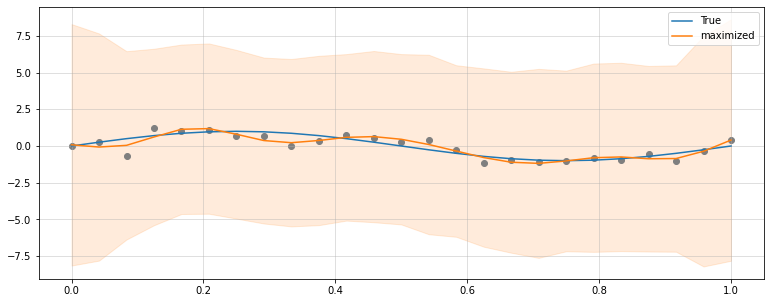

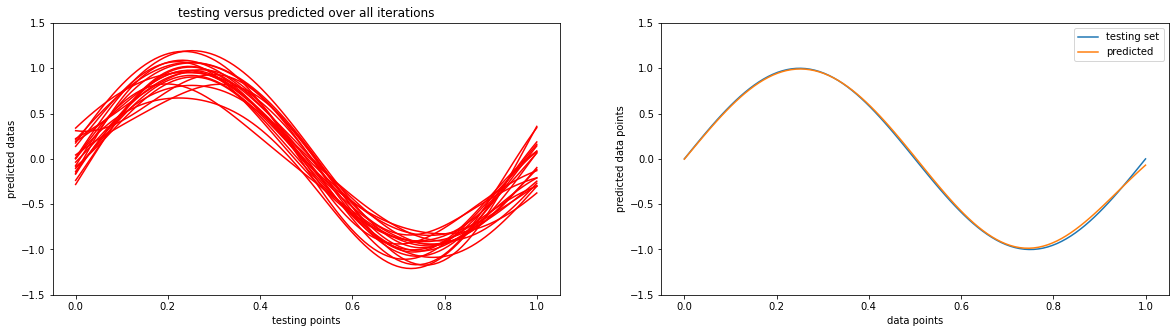

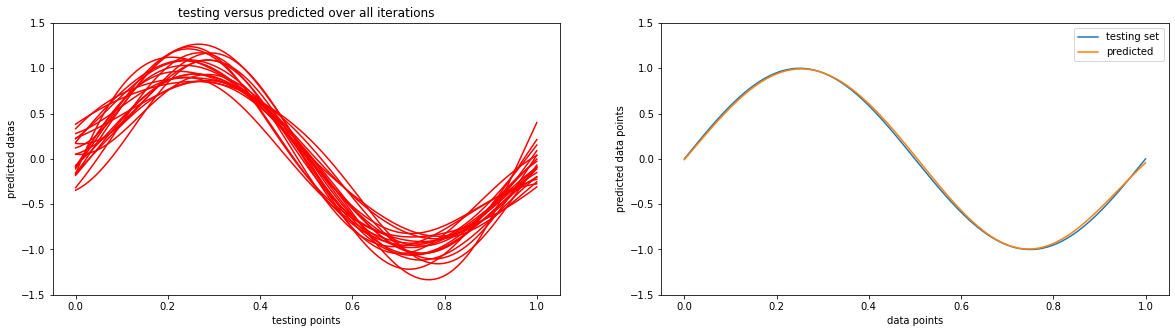

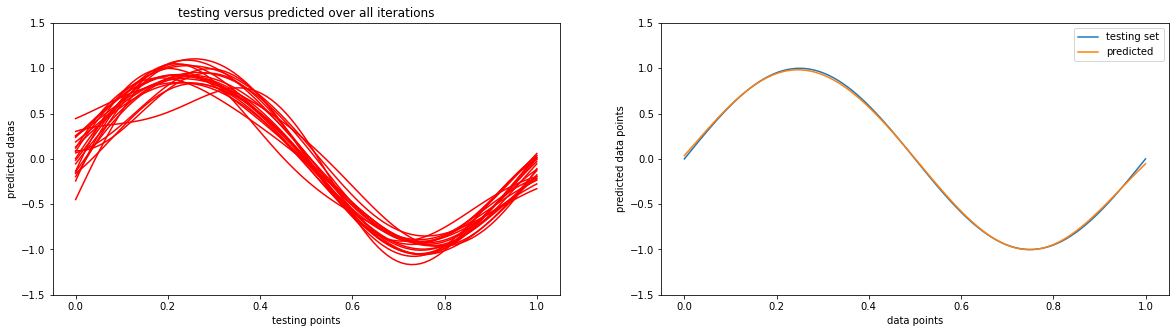

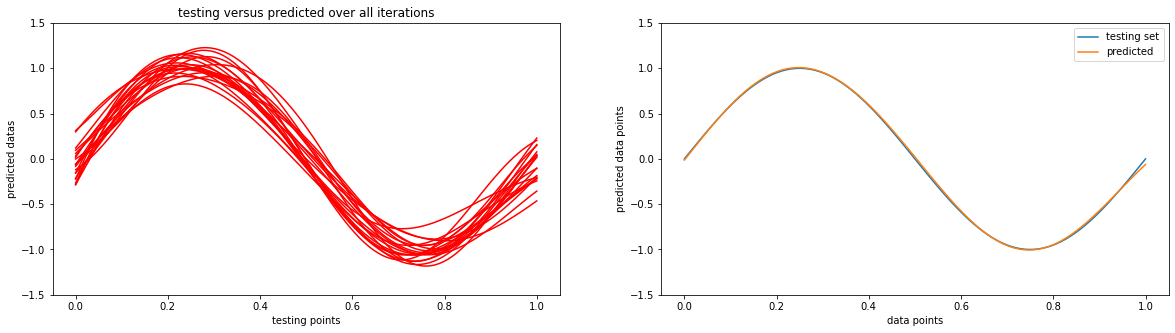

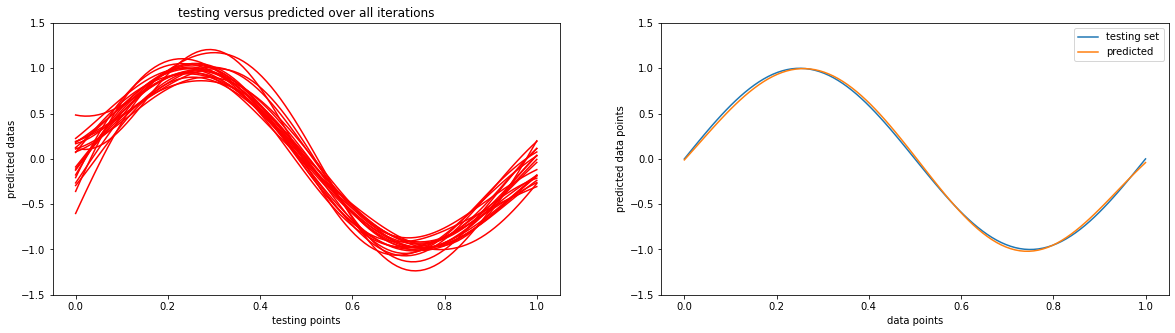

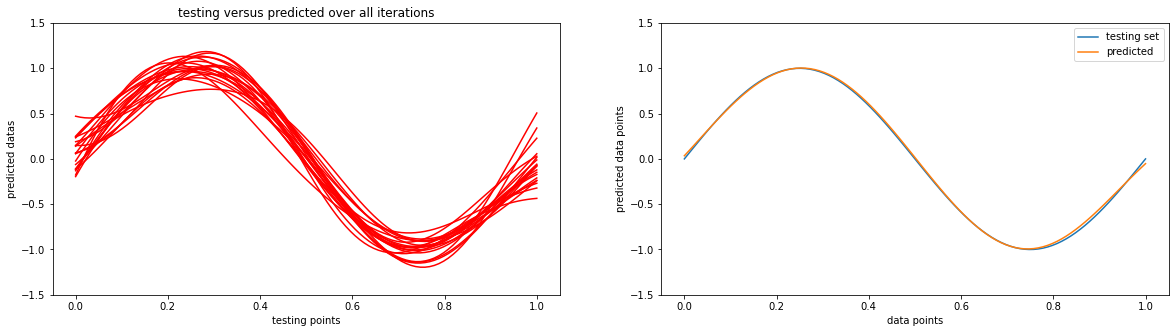

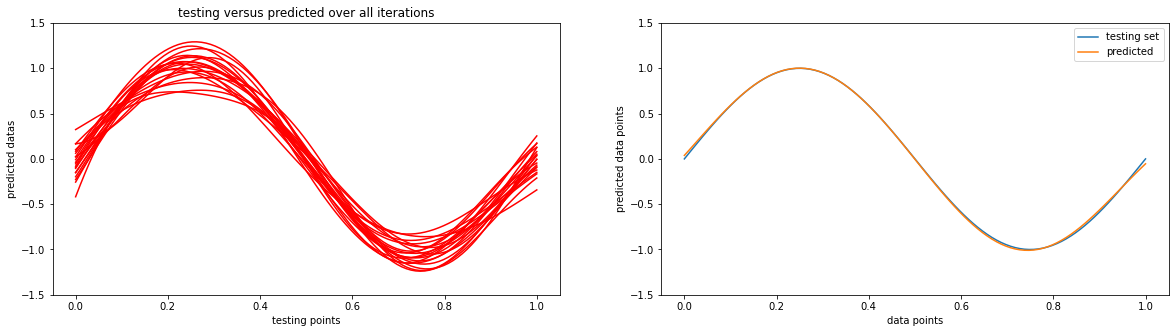

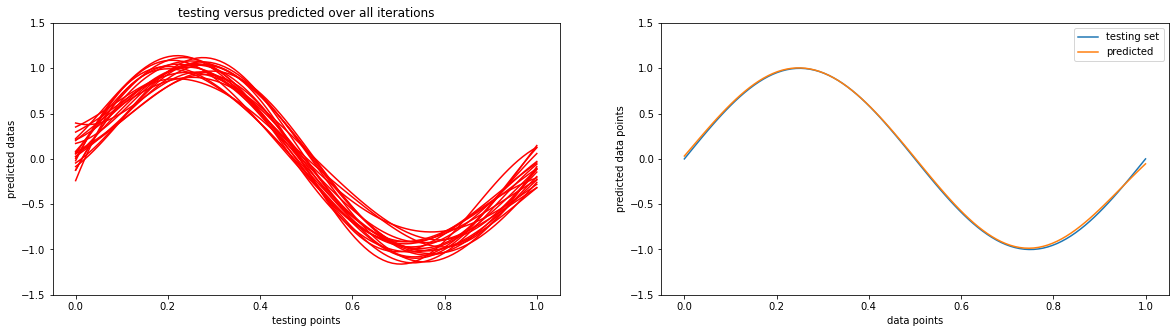

In [179]:
##question 5 -Bias variance trade-off
## 100 datasets with each set consists of 25 points data sets

x_train,y_train=load_data(sinusoidal,25, np.sqrt(0.1),domain=[0, 1])  #Noisy sinusoidal 100 data sets each of 25 data points
N=25



##Using gaussian basis function,fitting the model
def sigmoid(z): 
  return 1 / (1 + np.exp(-z))

def gaussian_kernel(x, mu, s): return np.exp(-(x - mu)**2 / (2 * s ** 2))

def gaussian_design_matrix(x, mus, s, bias=True):
    
    Phi = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi



def posterior(Phi, t, alpha, beta):
    
    SN_inv = alpha + beta * Phi.T @ Phi
    mN = beta * np.linalg.pinv(SN_inv) @ Phi.T @ t[:, np.newaxis]
    return mN, SN_inv

variance=20
precision=1/variance
alpha, beta = 0.01,-0.5
s = 0.2
models = [1, 2, 3, 4, 5, 6, 7, 8,9]


alpha, beta = 0.01, -.5
alpha, beta = 0.01, -.5 #standard prior
M = 25 # gaussian basis functions + bias term
mus = np.linspace(0, 1, M)
Phi = gaussian_design_matrix(x_train, mus, s)
N = Phi.shape[0]

mN, SN_inv = posterior(Phi,y_train, alpha, beta)
##Model selection
x_in = np.linspace(0, 1, 25)
plt.figure(figsize=(13, 5))
phi_x = gaussian_design_matrix(x_in, mus, s, bias=True)
stdev = 1 / beta + np.diag(phi_x @ np.linalg.inv(SN_inv) @ phi_x.T)
mu = (phi_x @ mN).ravel()

plt.plot(x_in, np.sin(2 * np.pi * x_in), label="True")
plt.plot(x_in, mu, label="maximized", c="tab:orange")
plt.fill_between(x_in, mu - 2 * stdev, mu + 2 * stdev, alpha=0.15, color="tab:orange")
plt.scatter(x_train, y_train, c="tab:gray")
plt.grid(alpha=0.5)
plt.legend();

x_test=np.linspace(0,1,100)
y_test=sinusoidal(x_test)
for a in [1e2, 1., 1e-9,10,0.01,0.0001,50,1e-12]: #Different lambdas
    y_list = []
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    for i in range(100):
        x_train, y_train = load_data(sinusoidal, 25, 0.25)
        mus=np.linspace(-1,1,25) #M=25
        X_train = gaussian_design_matrix(x_train, mus, s, bias=True)
        X_test = gaussian_design_matrix(x_test, mus, s, bias=True)
        Y = np.c_[y_train] # defining labels
        w1=least_squares(X_train.T,Y.T,regularized=True) #Regularised least squares
        y = X_test.dot(w1) #Prediction
        y_list.append(y)
        if i < 20:
            plt.plot(x_test, y, c="red")
    plt.ylim(-1.5, 1.5)
    plt.xlabel("testing points")
    plt.ylabel("predicted datas")
    plt.title("testing versus predicted over all iterations")
    plt.subplot(1, 2, 2)
    plt.plot(x_test, y_test,label="testing set")
    plt.plot(x_test, np.asarray(y_list).mean(axis=0),label="predicted")
    plt.xlabel("data points")
    plt.ylabel("predicted data points")
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()

We see that small
values of λ allow the model to become finely tuned to the noise on each individual
Conversely, a large value of λ pulls the weight
parameters towards zero leading to large bias.
Although the bias-variance decomposition may provide some interesting in-sights into the model complexity issue from a frequentist perspective, it is of limited practical value, because the bias-variance decomposition is based on averages with respect to ensembles of data sets,

REGULARISATION REDUCES THE PROBLEM OF OVERFITTING WHICH IS CLEARLY SEEN FROM ABOVE GRAPHS

6. Understanding MAP estimate

(a) Generate 100 noisy data points of a sinusoid. Fit a 20th order linear
regression model with Gaussian basis functions. Starting from a standard
normal prior, update the statistivs of the posterior density of the parameters
using Bayesian sequential updates.

(b) Sample a parameter vector from the posterior distribution, and obtain the
curve fit for this realization. Repeat this for several times, and estimate the
average of these curve fits, and compare it with the original sinusoid.

(c) Use the posterior distribution of the parameters to evaluate the predictive
distribution of target p(t0/x0, X, t), and plot it for different number of training
datapoints, as discussed in the class.

<ipython-input-180-0b4df87319e0>:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  new_alpha = gamma / np.asscalar(mN.T @ mN)
<ipython-input-180-0b4df87319e0>:89: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Phi = np.column_stack((gaussian_kernel(x, mu_j, s) for mu_j in mu))
<ipython-input-180-0b4df87319e0>:89: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Phi = np.column_stack((gaussian_kernel(x, mu_j, s) for mu_j in mu))
<ipython-input-180-0b4df87319e0>:89: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is dep

updated model parameters mean: [[  -287.02147764+2.97422842e-22j]
 [ -2568.62994764-4.45658440e-21j]
 [ 11851.84904995+6.80307286e-21j]
 [ -9167.92321568+1.31806603e-21j]
 [-10171.5672934 -4.15540250e-21j]
 [  5380.0087666 -3.33771273e-21j]
 [ 12897.27281136+9.85799320e-22j]
 [  3034.3179032 +3.62225014e-21j]
 [-10794.31806167+2.09831845e-21j]
 [-11412.28669881-1.43054364e-21j]
 [  1837.0782    -3.30395906e-21j]
 [ 13270.0857606 -1.72506170e-21j]
 [  9395.06429548+1.53706966e-21j]
 [ -5621.3439934 +3.11390711e-21j]
 [-14592.14210917+1.46602588e-21j]
 [ -6763.13887775-1.69102258e-21j]
 [  9486.23288364-3.29507044e-21j]
 [ 15314.27552679-1.41045930e-21j]
 [  2874.72668221+2.07219708e-21j]
 [-14135.74110847+3.60116952e-21j]
 [-14362.12228102+1.01474332e-21j]
 [  5243.93310405-3.34180437e-21j]
 [ 20305.59615606-4.13137018e-21j]
 [  4060.65300345+1.26091382e-21j]
 [-27386.35766097+6.84631371e-21j]
 [ 13016.06080982-4.46805408e-21j]]
updated model parameters alpha: [(2.8007053246675545e-10-2

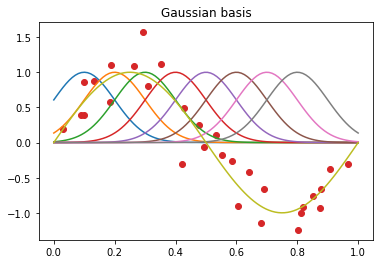

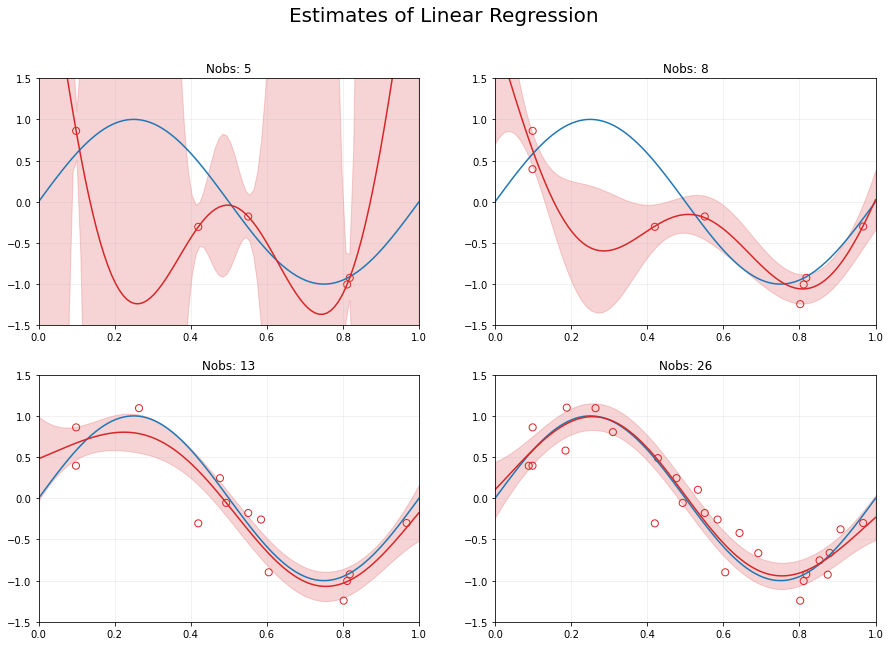

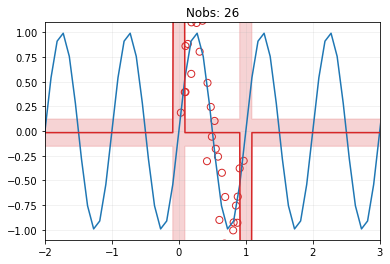

In [180]:
## Question 6
#Predictive distribution for Bayesian Linear Regression¶
#The predictive distribution for a linear model using MAP

def f(x): 
  return np.sin(2 * np.pi * x)
def gaussian_kernel(x, mu, s): 
  return np.exp(-(x - mu) ** 2 / (2 * s ** 2))

x_true = np.linspace(0, 1, 100) #100 data points
y_true = f(x_true)

x_train,y_train=load_data(sinusoidal,25, np.sqrt(0.1),domain=[0, 1])  #Noisy sinusoidal 100 data sets 
N=25
variance=20
precision=1/variance
alpha, beta = 0.01,-0.5
s = 0.2
models = [1, 2, 3, 4, 5, 6, 7, 8,9]
def gaussian_design_matrix(x, mus, s, bias=True):
    Phi = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def posterior(Phi, t, alpha, beta):
    SN_inv = alpha + beta * Phi.T @ Phi
    mN = beta * pinv(SN_inv) @ Phi.T @ t[:, np.newaxis]
    return mN, SN_inv


alpha, beta = 0.01, -.5 #standard prior
M = 25 # gaussian basis functions + bias term
mus = np.linspace(0, 1, M)
Phi = gaussian_design_matrix(x_train, mus, s)
N = Phi.shape[0]

delta_alpha, delta_beta = float('inf'), float('inf')
tol = 2e-5
alpha_hist, beta_hist = [], []
phi_eigs = eigvals(Phi.T @ Phi)
mN, SN_inv = posterior(Phi,y_train, alpha, beta)
#Sequential updates
while delta_alpha > tol and delta_beta > tol:
    # Update eigenvalues of the matrix
    lambdas = phi_eigs * beta
    gamma = (lambdas / (lambdas + alpha)).sum()
    # Update model parameters
    mN, SN_inv = posterior(Phi, y_train, alpha, beta)
    # Compute new hyperparams
    new_alpha = gamma / np.asscalar(mN.T @ mN)
    new_beta = (Phi.shape[0] - gamma) / ((y_train[:, np.newaxis] - Phi @ mN) ** 2).sum() 
    # Compute the percentual change in hyperparams
    delta_alpha = np.abs(new_alpha / alpha - 1)
    delta_beta = np.abs(new_beta / beta - 1)
    # Update alpha, beta
    alpha, beta = new_alpha, new_beta
    alpha_hist.append(alpha)
    beta_hist.append(beta)
print("updated model parameters mean:",mN)
print("updated model parameters alpha:",alpha_hist)
print("updated model parameters beta:",beta_hist)
print("updated model parameters SN inverse:",SN_inv)


#Linear basis function of choice
#colors = branca.colormap.linear.Accent_03
s = 0.1
mu = np.arange(0.1, 0.9, 0.1)
for j, mu_j in enumerate(mu):
    plt.plot(x_true, gaussian_kernel(x_true, mu_j, s))#, c=colors(j / len(mu)))
plt.title("Gaussian basis")
#A sample of values to learn from

def sample_sinusoidal(S, beta, x_samp=None):
    x_samp = np.random.uniform(0, 1, S)  if x_samp is None else x_samp
    y_samp = np.random.normal(f(x_samp), 1 / np.sqrt(beta), S)
    return x_samp, y_samp

np.random.seed(314159)
precision = 15
x_s, y_s = sample_sinusoidal(30, precision)

plt.plot(x_true, y_true)
plt.scatter(x_s, y_s, c="tab:red")

def fill_basis(x, s, mu):
    Phi = np.column_stack((gaussian_kernel(x, mu_j, s) for mu_j in mu))
    # bias term
    Phi = np.column_stack((np.ones_like(x), Phi))
    return Phi

def posterior_weights(alpha, s, beta, mus, x_train, y_train):
    Phi = fill_basis(x_train, s, mus)
    SN = inv(alpha + beta * Phi.T @ Phi)
    mN = beta * SN @ Phi.T @ y_train.reshape(-1, 1)
    return mN, SN
#Estimating the Confidence Intervals for the Regression
def posterior(Phi, t, alpha, beta):
    SN_inv = alpha + beta * Phi.T @ Phi
    mN = beta * pinv(SN_inv) @ Phi.T @ t[:, np.newaxis]
    return mN, SN_inv


def log_evidence(M, alpha, beta, s=0.5):
    """
    Compute the log-evidence for a design matrix
    with gaussian basis functions
    """
    mus = np.linspace(0, 1, M)
    Phi = gaussian_design_matrix(x_train, mus, s, bias=True)
    mN, SN_inv = posterior(Phi, y_train, alpha, beta)
    
    E_mN = beta / 2 * norm(y_train[:, np.newaxis] - Phi @ mN) ** 2 + alpha / 2 * mN.T @ mN
    log_ev = N / 2 * np.log(beta) + M / 2 * np.log(alpha) - \
             1 / 2 * np.log(det(SN_inv)) - E_mN - N / 2  * np.log(2 * np.pi)
    return np.asscalar(log_ev)

def plot_estimate(xt, yt, xrange, yrange, mu, sigma, ax=plt):
    ax.plot(xrange, yrange)
    ax.plot(xrange, mu, c="tab:red")
    ax.fill_between(xrange, mu.ravel() - 2 * sigma,
                     mu.ravel() + 2 * sigma,
                     color="tab:red", alpha=0.2)
    ax.scatter(xt, yt, facecolors="none", edgecolors="tab:red", s=50)
    ax.grid(alpha=0.2);

step = 0.25
mu = np.arange(0, 1 + step, step) # mus to consider for the Gaussian basis functions
s = 0.3
alpha = 0.1

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
vals = [5, 8, 13, 26]
for axi, v in zip(ax.ravel(), vals):
    xtarget = x_s[:v]
    ytarget = y_s[:v]

    mN, SN = posterior_weights(alpha, s, precision, mu, xtarget,  ytarget)
    Phi = fill_basis(x_true, s, mu).T
    mu_pred = Phi.T @ mN
    sigma_pred = 1 / precision + np.diag(Phi.T @ SN @ Phi)
    
    axi.set_xlim(0, 1)
    axi.set_ylim(-1.5, 1.5); 
    axi.set_title(f"Nobs: {v}")
    plot_estimate(xtarget, ytarget, x_true, y_true, mu_pred, sigma_pred, ax=axi)
plt.suptitle("Estimates of Linear Regression", size=20);

#If we use localized basis functions such as Gaussian, then in regions away from the basis function centers, the contribution from the second term in the predictive variance will go to zero


x_true = np.linspace(-4, 5, 100)
y_true = f(x_true)

step = 1
mu = np.arange(0, 1 + step, step) # mus to consider for the Gaussian basis functions
s = 0.01
alpha = 0.1

fig, axi = plt.subplots(1,1)
xtarget = x_s
ytarget = y_s

mN, SN = posterior_weights(alpha, s, precision, mu, xtarget,  ytarget)
Phi = fill_basis(x_true, s, mu).T
mu_pred = Phi.T @ mN
sigma_pred = 1 / precision + np.diag(Phi.T @ SN @ Phi)
print("Predicted mean is:",mu_pred)
print("predicted standard deviation is",sigma_pred)
axi.set_xlim(-2, 3)
axi.set_ylim(-1.1, 1.1); 
axi.set_title(f"Nobs: {v}")
plot_estimate(xtarget, ytarget, x_true, y_true, mu_pred, sigma_pred, ax=axi)